# 广告场景示例

实现电视（TV）、收音机（Radio）和报纸（Newspaper）广告投入与销售额预测回归分析




In [1]:
#!/usr/bin/python
# -*- coding:utf-8 -*-

import csv
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


## 应用线性回归基本理论
- **数据集划分**  
广告投放与销售量数据进行切分，其中 80% 作为训练数据、20% 作为测试数据
- **模型选型**   
线性模型，建立线性回归模型
- **模型训练**  
使用训练集训练模型
- **模型预测**  
使用测试集求得预测值
- **模型效果**  
求得模型的均方误差、均方根误差评价指标

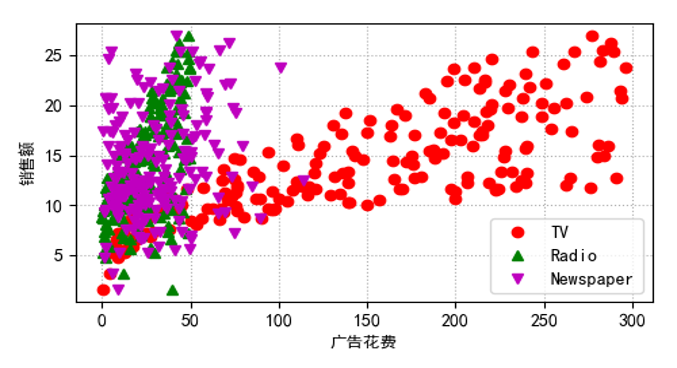

In [2]:
# 定义函数
def linearRegressionModel(x, y):
    # 将数据分为测试数据和训练数据二部分
    x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=1)
    # print(type(x_test))
    # print(x_train.shape, y_train.shape)
    
    # 建立线性回归模型
    linearRegression = LinearRegression()
    
    # 模型训练
    model = linearRegression.fit(x_train, y_train)
    # print(model)# 求解f(x)=wx+b模型
        
    # 求得 w 和 b
    w = linearRegression.coef_
    b = linearRegression.intercept_
        
    order = y_test.argsort(axis=0)
    y_test = y_test.values[order]
    x_test = x_test.values[order, :]
    
    # 模型预测
    y_predict = linearRegression.predict(x_test)
    
    # 模型评价指标
    mse = np.average((y_predict - np.array(y_test)) ** 2)  # 均方误差
    rmse = np.sqrt(mse)  # 均方根误差
    
    # 确定系数
    R2_train=linearRegression.score(x_train, y_train) # 训练数据确定系数
    R2_test=linearRegression.score(x_test, y_test) # 测试数据确定系数
    
    #返回值
    return w,b,x_test,y_test,y_predict,mse,rmse,R2_train,R2_test




辅助材料：
```python
x = np.array([1,4,3,-1,6,9])
y = x.argsort()
```
argsort() 函数 是将 x 中的元素从小到大排列，提取其对应的 index(索引)，然后输出到 y。
例如：
x[3]=-1最小，所以 y[0]=3,x[5]=9 最大，所以y[5]=5。

In [3]:
# x = np.array([1,4,3,-1,6,9])
# y = x.argsort()
# print(y)

普通线性回归模型建立成功后，编写调用语句   
有三维数据对最终的销售有影响，分别是：电视、收音机、报纸  
故意设计了3中情况，分别为：  
- 收音机广告投放
- 电视和收音机广告投放
- 电视、收音机、新闻报纸广告投放

分别对上面三种情况设计线性回归模型  
然后求解三种情况下的模型评估指标，进而对比三种情况模型的效果。


In [4]:
# 数据文件路径
path = '.\\Advertising.csv'

# pandas读入
data = pd.read_csv(path)
x_R = data[[ 'Radio']] # 读入收音机广告信息数据
x_TR = data[['TV', 'Radio']] # 读入电视广告和收音机广告投入的信息数据
x_TRN = data[['TV', 'Radio', 'Newspaper']] # 读入电视广告、收音机广告和新闻报纸广告投入的信息数据
y = data['Sales'] # 读入销售额信息数据


# 调用回归模型
w,b,x_test,y_test,y_predict,mse,rmse,R2_train,R2_test = linearRegressionModel(x_R, y)
w_TR,b_TR,x_test_TR, y_test_TR, y_predict_TR, mse_TR, rmse_TR, R2_train_TR, R2_test_TR = linearRegressionModel(x_TR, y)
w_TRN,b_TRN,x_test_TRN, y_test_TRN, y_predict_TRN, mse_TRN, rmse_TRN, R2_train_TRN, R2_test_TRN = linearRegressionModel(x_TRN, y)




求得三种情况下确定系统、均方根误差实际值，多因素质参与拟合时比单因素回归效果好很多。  
这充分说明了，当只有收音机（Radio）参与模型计算时，由于信息较小，使线性回归模型学习能力较弱，不能很好学习出需要的信息  
通过增加新的特征因素电视和新闻报纸时，得到更好的拟合结果


```
    收音机 			R2_train =  0.32077487337005284 	 R2_test =  0.35713855215895074   RMSE =  3.455522114906106
   电视-收音机       R2_train =  0.8958528468776601 	    R2_test =  0.8947344950027067 	  RMSE =  1.3982924890777741
电视-收音机-新闻报纸 	R2_train =  0.8959372632325174 	    R2_test =  0.8927605914615384 	  RMSE =  1.4113417558581582
```

In [5]:

# 打印确定系数和均方根误差
print('收音机 \t\t\t R2_train = ', R2_train,'\t R2_test = ', R2_test,' RMSE = ', rmse)
print('电视-收音机 \t\t R2_train = ', R2_train_TR, '\t R2_test = ', R2_test_TR,'\t RMSE = ', rmse_TR)
print('电视-收音机-新闻报纸 \t R2_train = ', R2_train_TRN, '\t R2_test = ', R2_test_TRN,'\t RMSE = ', rmse_TRN)


收音机 			 R2_train =  0.32077487337005284 	 R2_test =  0.35713855215895074  RMSE =  3.455522114906106
电视-收音机 		 R2_train =  0.8958528468776601 	 R2_test =  0.8947344950027067 	 RMSE =  1.3982924890777741
电视-收音机-新闻报纸 	 R2_train =  0.8959372632325174 	 R2_test =  0.8927605914615384 	 RMSE =  1.4113417558581582


求得的三种情况下的线性回归方程为：


In [6]:
# 打印方程系数
print('f(收音机) = ', w, ' x + ', b)
print('f(电视,收音机) = ', w_TR, ' x + ', b_TR)
print('f(电视,收音机,新闻报纸) = ', w_TRN, ' x + ', b_TRN)


f(收音机) =  [0.20071881]  x +  9.134125488582198
f(电视,收音机) =  [0.04686997 0.1800065 ]  x +  2.9475150360289994
f(电视,收音机,新闻报纸) =  [0.0468431  0.17854434 0.00258619]  x +  2.9079470208164295


In [7]:
print('**********************')
print(y_test)
print('**********************')
print(y_predict)
print('**********************')
print(y_predict_TR)
print('**********************')
print(y_predict_TRN)
print('**********************')

**********************
[ 7.6  8.5  9.5  9.5 10.1 10.5 10.7 11.  11.3 11.5 11.5 11.7 11.9 11.9
 12.5 12.8 12.9 12.9 13.4 14.5 14.8 14.9 15.5 15.9 15.9 16.6 16.7 16.9
 17.1 17.3 17.4 17.6 18.4 18.9 19.6 20.2 22.3 23.2 23.8 25.5]
**********************
[13.16857348 14.29259878  9.41513182 16.9621589  14.49331759 12.34562637
 11.06102602 10.27822268 13.248861   11.94418876  9.81656943 10.69973217
 12.6266327   9.81656943 16.48043376  9.95707259 11.30188859 12.82735151
 10.78001969 13.32914852 11.16138542 12.76713586 13.3492204  12.48612954
 16.5406494  13.61015485 18.72848438 15.47683974 13.87108929 16.27971496
 13.95137682 13.40943604 15.05533025 14.57360511 17.56431531 15.19583341
 17.94568104 17.46395591 19.08977823 17.56431531]
**********************
[ 7.48429727  8.75011855  7.68498075 11.16764004  9.77378461  9.13663933
  9.38132296 10.03852687  9.88105063 10.5014414  13.98341958 12.32883551
 11.37124838 14.55054628 12.71353738 17.31064343 13.36567675 12.43241041
 15.00680872 14.4197

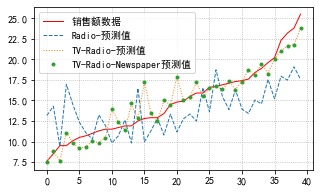

In [8]:

# 模型学习结果可视化
def linearRegressionPlot(x_test,y_test,y_predict,y_predict1,y_predict2):
    mpl.rcParams['font.sans-serif'] = ['simHei']
    mpl.rcParams['axes.unicode_minus'] = False
    plt.figure(facecolor='w', figsize=(5, 3))
    t = np.arange(len(x_test))
    plt.plot(t, y_test, 'r-', linewidth=1, label='销售额数据')
    plt.plot(t, y_predict, '--', linewidth=1, label='Radio-预测值')
    plt.plot(t, y_predict1, ':', linewidth=1, label='TV-Radio-预测值')
    plt.plot(t, y_predict2, '.', linewidth=1, label='TV-Radio-Newspaper预测值')
    plt.legend(loc='upper left')
    #plt.title('线性回归预测销售额', fontsize=10)
    plt.grid(b=True, ls=':')
    plt.show()
    
    
# 模型学习结果可视化
linearRegressionPlot(x_test, y_test, y_predict, y_predict_TR, y_predict_TRN)


当 Radio 一个因素参加线性回归的销售额预测时，预测结果与实际销售额相差很大，当增加 TV 和 Newspaper 因素时，预测结果精度提升了很多。